In [2]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
np.random.seed(42)

x = dataset.data
y = dataset.target

indices = np.random.permutation(len(x))
test_size = 100

x_train = x[indices[:-test_size]]
y_train = y[indices[:-test_size]]

x_test = x[indices[-test_size:]]
y_test = y[indices[-test_size:]]

In [6]:
# Sklearn Code
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)

print("Coeffs: ", regr.coef_)
print("Intercept: ", regr.intercept_)
print("R2: ", regr.score(x_test, y_test))

Coeffs:  [-1.03634958e-01  5.20174881e-02 -1.84070408e-02  2.31904591e+00
 -1.72854124e+01  3.60615634e+00  1.04201337e-02 -1.53285310e+00
  3.28088175e-01 -1.44990990e-02 -9.14708753e-01  8.67967981e-03
 -5.48167617e-01]
Intercept:  37.96154194044122
R2:  0.6857636836584454


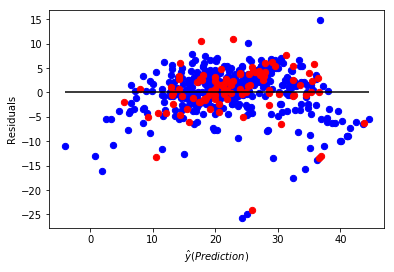

In [7]:
# Residual Plot (Restwert)
import matplotlib.pyplot as plt

train_pred = regr.predict(x_train)
test_pred = regr.predict(x_test)

min_val = min(min(train_pred), min(test_pred))
max_val = max(max(train_pred), max(test_pred))

plt.scatter(train_pred, train_pred - y_train, color="blue", s=40)
plt.scatter(test_pred, test_pred - y_test, color="red", s=40)
plt.hlines(y = 0, xmin =min_val, xmax=max_val)
plt.xlabel("$\hat{y} (Prediction)$")
plt.ylabel("Residuals")
plt.show()